In [13]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [14]:
df1=pd.read_csv("credit.csv")
df1.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [15]:
df_srm=df1.dropna(axis=0, how='all') #srm=senza righe mancanti;
df_srm.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [16]:
df=df_srm.copy()
df.drop(df_srm.columns[[0,1,12]], axis="columns",  inplace=True) 
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [17]:
class_name = 'Loan Status'

In [18]:
Ownership= df["Home Ownership"].replace("HaveMortgage", "Home Mortgage")
Ownership.unique()
df["Home Ownership"]= Ownership
df["Home Ownership"].unique() #appare due volte Mortgage, quindi è stato sostituito cHave mortgage con home mortgage

df["Purpose"].unique() #apparte due volte il termine other, si deve sostituire
purpose=df["Purpose"].replace("other", "Other")  #sostituito
purpose.unique()
df["Purpose"]=purpose
df["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [19]:
def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df
df = remove_missing_values(df)

In [20]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [21]:
def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns
numeric_columns = get_numeric_columns(df)
numeric_columns

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [22]:
def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map



In [23]:
def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1)
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values
rdf = df.copy(deep=True)
df, feature_names, class_values = one_hot_encoding(df, class_name)
real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
features_map = get_features_map(feature_names, real_feature_names)

In [24]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose=Medical Bills,Purpose=Other,Purpose=Take a Trip,Purpose=major_purchase,Purpose=moving,Purpose=renewable_energy,Purpose=small_business,Purpose=vacation,Purpose=wedding,Loan Status
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df.shape

(100000, 43)

In [26]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term=Long Term',
       'Term=Short Term', 'Years in current job=1 year',
       'Years in current job=10+ years', 'Years in current job=2 years',
       'Years in current job=3 years', 'Years in current job=4 years',
       'Years in current job=5 years', 'Years in current job=6 years',
       'Years in current job=7 years', 'Years in current job=8 years',
       'Years in current job=9 years', 'Years in current job=< 1 year',
       'Home Ownership=Home Mortgage', 'Home Ownership=Own Home',
       'Home Ownership=Rent', 'Purpose=Business Loan', 'Purpose=Buy House',
       'Purpose=Buy a Car', 'Purpose=Debt Consolidation',
       'Purpose=Educational Expenses', 'Purpose=Home Improvements',
       'Purpose=Medical Bills', 'Purpo

In [27]:
index1 = np.random.choice( df.index,50000, replace=False)
df_h=df.drop(index=index1, axis=0)
df_h.shape

(50000, 43)

In [28]:
df1 = df.copy()
Q3 = df.quantile(0.95)
Q1 = df.quantile(0.25)
IQR = Q3 - Q1
print(IQR)
df = df1[~((df1 >(Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.isnull().sum()

Current Loan Amount               9.982035e+07
Credit Score                      3.654561e+02
Annual Income                     1.705691e+06
Monthly Debt                      3.026345e+04
Years of Credit History           1.820000e+01
Number of Open Accounts           1.200000e+01
Number of Credit Problems         1.000000e+00
Current Credit Balance            6.480710e+05
Maximum Open Credit               1.366777e+06
Bankruptcies                      1.000000e+00
Tax Liens                         0.000000e+00
Term=Long Term                    1.000000e+00
Term=Short Term                   1.000000e+00
Years in current job=1 year       1.000000e+00
Years in current job=10+ years    1.000000e+00
Years in current job=2 years      1.000000e+00
Years in current job=3 years      1.000000e+00
Years in current job=4 years      1.000000e+00
Years in current job=5 years      1.000000e+00
Years in current job=6 years      1.000000e+00
Years in current job=7 years      1.000000e+00
Years in curr

Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term=Long Term                    0
Term=Short Term                   0
Years in current job=1 year       0
Years in current job=10+ years    0
Years in current job=2 years      0
Years in current job=3 years      0
Years in current job=4 years      0
Years in current job=5 years      0
Years in current job=6 years      0
Years in current job=7 years      0
Years in current job=8 years      0
Years in current job=9 years      0
Years in current job=< 1 year     0
Home Ownership=Home Mortgage      0
Home Ownership=Own Home           0
Home Ownership=Rent               0
Purpose=Business Loan       

## normalizzazione

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [31]:
X.shape

(78595, 43)

##### Elbow's method

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

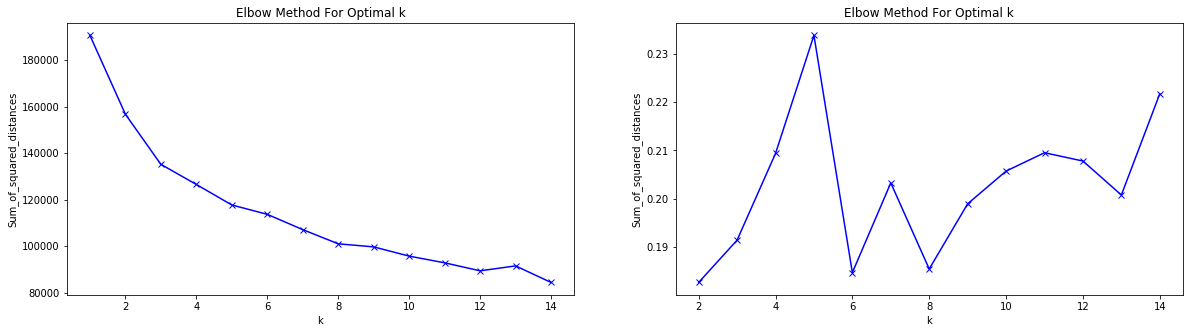

In [19]:
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()

# k-means

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
kmeans = KMeans(n_clusters=4, n_init=50, max_iter=500)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_[:5]

In [19]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([29840, 24920,  8803, 12237], dtype=int64))

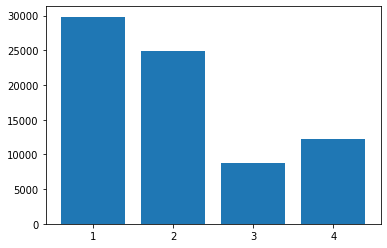

In [20]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))
x = np.linspace(1,4,4,endpoint=True)
plt.xticks(np.linspace(1,5
                       ,5,endpoint=True))
plt.bar(x,hist)
plt.show()



In [ ]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

##### Best epsilon

In [ ]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
neigh = NearestNeighbors(n_neighbors=90)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps=0.3, min_samples=90)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=90, n_jobs=None, p=None)

In [ ]:
dbscan.labels_[:5]

In [23]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127],
       dtype=int64),
 array([24378,   254,   290,   545,  2727,  1327,  4444,   221,   714,
         1067,  1357,   647,   409,  1010,   511,   318,   137,   804,
         2611,   626,   728,   191,   568,   719,   284,   306,   896,
          555,   185,   324,  1361,   37

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
# se avessi utilizzato eps e mink dato dal knee method otterrei una silhuoette di 0.4 ma ottengo 40 clusters

###### Dimensionality Reduction

In [22]:
rows2remove = np.random.choice(df.index, 20000 , replace=False)#26,4%

In [23]:
dfh = df.drop(index=rows2remove, axis=0)
print(len(dfh))

55800


In [24]:
scaler = MinMaxScaler()
Y = scaler.fit_transform(dfh.values)

# Hierarchical clustering

In [31]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [28]:
#Complete Linkage

In [29]:
data_dist = pdist(Y, metric='euclidean')
data_link1 = linkage(data_dist, method='complete', metric='euclidean')

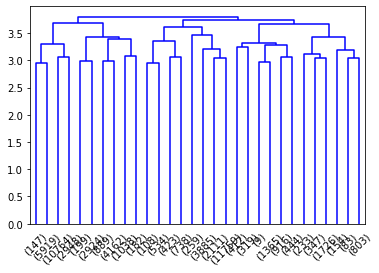

In [30]:
res = dendrogram(data_link1, color_threshold=None, truncate_mode='lastp')

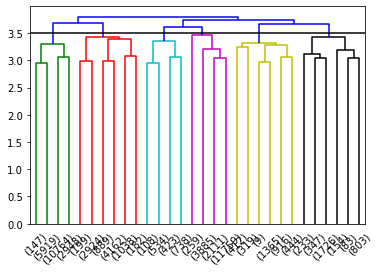

In [31]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link1, ax=ax, color_threshold=3.5, truncate_mode='lastp')
threshold = 3.5 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

In [32]:
# Single Linkage

In [33]:
data_link2 = linkage(data_dist, method='single', metric='euclidean')

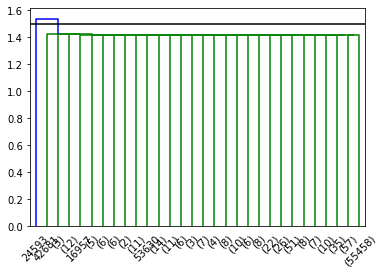

In [34]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link2, ax=ax, color_threshold=1.5, truncate_mode='lastp')
threshold = 1.5
ax.axhline(y=threshold, c='k')
plt.show()


In [35]:
#Group Average Linkage

In [ ]:
data_dist = pdist(Y, metric='euclidean')
data_link3 = linkage(data_dist, method='average', metric='euclidean')

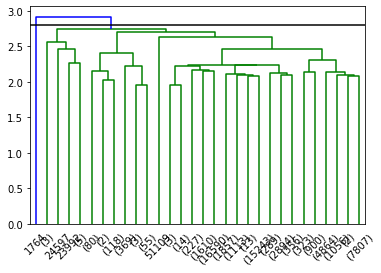

In [35]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link3, ax=ax, color_threshold=2.8, truncate_mode='lastp')
threshold = 2.8 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

In [36]:
data_link4 = linkage(data_dist, method='ward', metric='euclidean')# ward's method

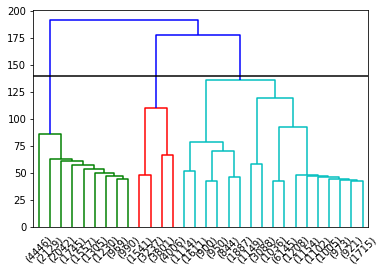

In [38]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link4, ax=ax, color_threshold=140, truncate_mode='lastp')
threshold = 140
ax.axhline(y=threshold, c='k')
plt.show()


# CLUSTERING ANALYSIS

###### distribution of variables within the clusters

In [ ]:
#Hierarchical

In [32]:
rows2remove = np.random.choice(df.index, 40000 , replace=False)

In [33]:
dfh = df.drop(index=rows2remove, axis=0)
print(len(dfh))

35800


In [34]:
scaler = MinMaxScaler()
Z = scaler.fit_transform(dfh.values)

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
aggl =AgglomerativeClustering(linkage='ward', distance_threshold= 140, n_clusters = None)
aggl.fit(Z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=140,
                        linkage='ward', memory=None, n_clusters=None)

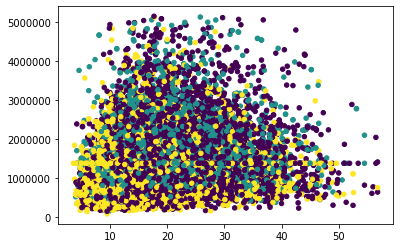

In [45]:
plt.scatter(dfh['Years of Credit History'],dfh['Annual Income'] ,c=aggl.labels_, s=20)
plt.show()

In [39]:
np.unique(aggl.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([16161,  9003, 10636], dtype=int64))

In [ ]:
# K-MEANS

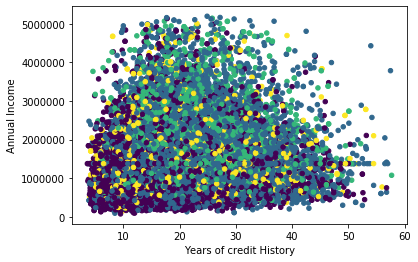

In [34]:
plt.scatter(df['Years of Credit History'],df['Annual Income'] ,c = kmeans.labels_, s=20)
plt.xlabel('Years of credit History')
plt.ylabel('Annual Income')
plt.show()

In [26]:
predict = kmeans.fit_predict(df)
clustersDf = pd.DataFrame(predict)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [27]:
combinedDf.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose=Take a Trip,Purpose=major_purchase,Purpose=moving,Purpose=other,Purpose=renewable_energy,Purpose=small_business,Purpose=vacation,Purpose=wedding,Loan Status,cluster_predicted
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [28]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [ ]:
# DBSCAN

In [ ]:
plt.scatter(df['Years of Credit History'],df['Loan Status'] ,c=dbscan.labels_, s=20)
plt.show()

In [ ]:
np.unique(dbscan.labels_, return_counts=True)# il dbscan mi trova troppi clusters

###### centroids analysis

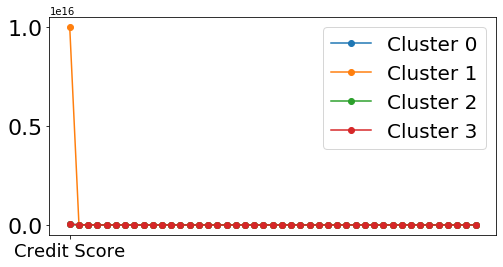

In [30]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
features = df.columns[1:2]

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0,len(features) ), features, fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
# L'analisi dei centroidi considerando i dataset comleti( con e senza outliers) non porta nessun risultato interpetabile
# guardando gli scatter plot nel caso di dataset completo senza outliers invece posso distinguere alcune feature in comune tra
# alcuni oggetti appartenenti allo stesso cluster, solo nel caso del k-means.

# CLASSIFICATION 

###### DATA PARTITIONING

In [74]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [49]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

###### PARAMETER TUNING with gridsearch and cross-validation

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [51]:
hyper_params_space={'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [0]}
tree= DecisionTreeClassifier()
search=GridSearchCV(tree,hyper_params_space)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [52]:
clf = search.best_estimator_
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [53]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 1.0
Credit Score 0.0
Annual Income 0.0
Monthly Debt 0.0
Years of Credit History 0.0
Number of Open Accounts 0.0
Number of Credit Problems 0.0
Current Credit Balance 0.0
Maximum Open Credit 0.0
Bankruptcies 0.0
Tax Liens 0.0
Term=Long Term 0.0
Term=Short Term 0.0
Years in current job=1 year 0.0
Years in current job=10+ years 0.0
Years in current job=2 years 0.0
Years in current job=3 years 0.0
Years in current job=4 years 0.0
Years in current job=5 years 0.0
Years in current job=6 years 0.0
Years in current job=7 years 0.0
Years in current job=8 years 0.0
Years in current job=9 years 0.0
Years in current job=< 1 year 0.0
Home Ownership=HaveMortgage 0.0
Home Ownership=Home Mortgage 0.0
Home Ownership=Own Home 0.0
Home Ownership=Rent 0.0
Purpose=Business Loan 0.0
Purpose=Buy House 0.0
Purpose=Buy a Car 0.0
Purpose=Debt Consolidation 0.0
Purpose=Educational Expenses 0.0
Purpose=Home Improvements 0.0
Purpose=Medical Bills 0.0
Purpose=Other 0.0
Purpose=Take a Trip 0.0
Pur

In [57]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [58]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

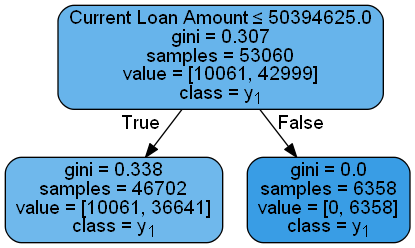

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=True,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [60]:
y_pred = clf.predict(X_test)

In [61]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.8104 (+/- 0.000)
F1-score: 0.4476 (+/- 0.000)


In [62]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [69]:
sm_tree_depths = range(1,6)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

In [70]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 81.03845 +/- 0.00377% on training dataset


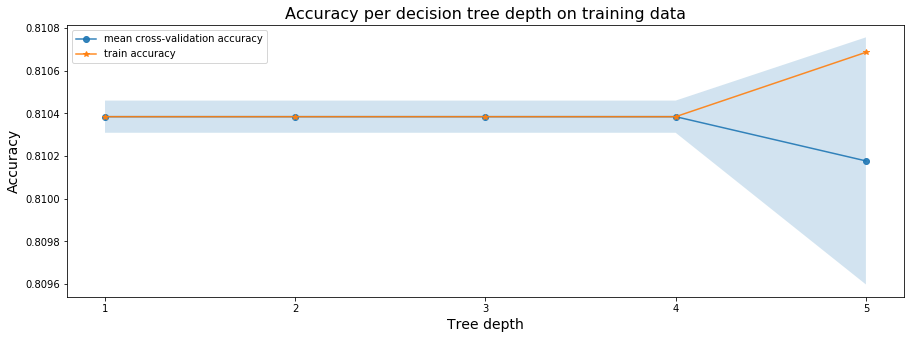

In [71]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

###### Performance del classificatore

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4312
           1       0.81      1.00      0.90     18428

    accuracy                           0.81     22740
   macro avg       0.41      0.50      0.45     22740
weighted avg       0.66      0.81      0.73     22740



C:\Users\Gianmarco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
y_score=clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

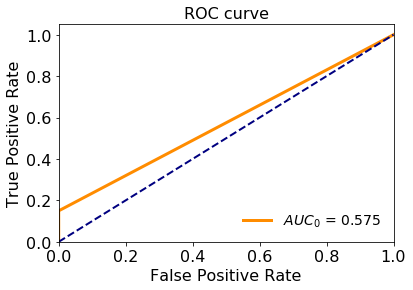

In [77]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [78]:
import matplotlib.pyplot as plt
import scikitplot as skplt

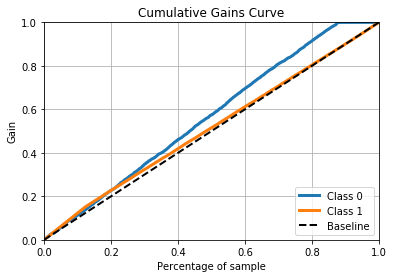

In [79]:
skplt.metrics.plot_cumulative_gain(y_test, y_score)

plt.show()

In [ ]:
#questo clussificatore peggiora leggermente quando lo applichiamo al dataset completo senza outliers rispetto a quello originle